# Data Modelling

To create and evaluate models for K-Nearest Neighbors (KNN), Decision Trees, Logistic Regression, and Support Vector Machines (SVM), we will:

### 1. **Key Metrics for Evaluation**
   - **Accuracy**: Overall correctness of the model.
   - **Precision**: Relevance of positive predictions (`yes` and `no` separately).
   - **Recall**: Coverage of actual positive instances.
   - **F1-Score**: Balance between precision and recall.
   - **AUC-ROC Curve**: Ability to distinguish between classes.

### 2. **Comparison for Both Target Values**
   - We'll compute metrics for both `yes` and `no` to ensure balanced evaluation, especially since the data is imbalanced.

### 3. **Steps**
   - Load the preprocessed training and test data.
   - Train each model using the training data.
   - Predict and evaluate on the test data.
   - Compare results across metrics and models.

In [1]:
# Load the training and test data from the files created during the last step
import pandas as pd

# File paths
X_train_path = '../data/X_train.csv'
X_test_path = '../data/X_test.csv'
y_train_path = '../data/y_train.csv'
y_test_path = '../data/y_test.csv'

# Load the data
X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path)
y_test = pd.read_csv(y_test_path)

# Display loaded data shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (2883, 31)
Test features shape: (1236, 31)
Training target shape: (2883, 1)
Test target shape: (1236, 1)


/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model: KNN
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1101
         yes       0.51      0.23      0.32       135

    accuracy                           0.89      1236
   macro avg       0.71      0.60      0.63      1236
weighted avg       0.87      0.89      0.87      1236

AUC-ROC: 0.81


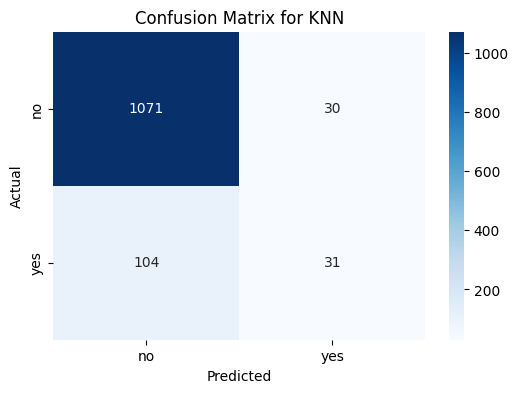

Model: Decision Tree
              precision    recall  f1-score   support

          no       0.94      0.93      0.93      1101
         yes       0.47      0.51      0.49       135

    accuracy                           0.88      1236
   macro avg       0.71      0.72      0.71      1236
weighted avg       0.89      0.88      0.89      1236

AUC-ROC: 0.72


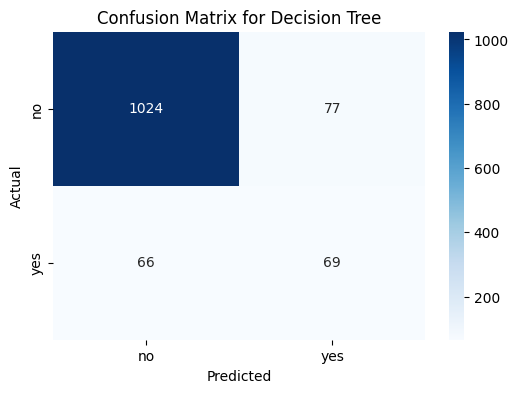

Model: Logistic Regression
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      1101
         yes       0.65      0.38      0.48       135

    accuracy                           0.91      1236
   macro avg       0.79      0.68      0.71      1236
weighted avg       0.90      0.91      0.90      1236

AUC-ROC: 0.92


/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


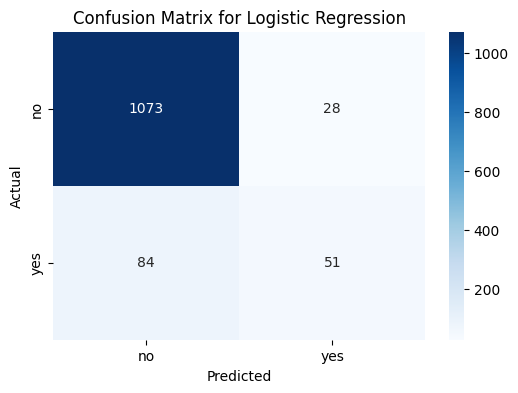

/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1101
         yes       0.68      0.27      0.38       135

    accuracy                           0.91      1236
   macro avg       0.80      0.63      0.67      1236
weighted avg       0.89      0.91      0.89      1236

AUC-ROC: 0.91


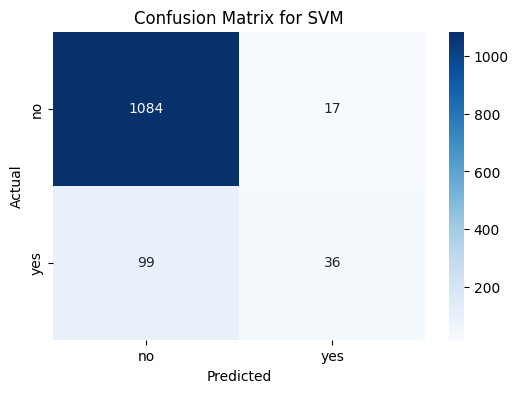


KNN:
Accuracy: 0.89
Precision for 'no': 0.91
Precision for 'yes': 0.51
Recall for 'no': 0.97
Recall for 'yes': 0.23
F1-Score for 'no': 0.94
F1-Score for 'yes': 0.32
AUC-ROC: 0.81

Decision Tree:
Accuracy: 0.88
Precision for 'no': 0.94
Precision for 'yes': 0.47
Recall for 'no': 0.93
Recall for 'yes': 0.51
F1-Score for 'no': 0.93
F1-Score for 'yes': 0.49
AUC-ROC: 0.72

Logistic Regression:
Accuracy: 0.91
Precision for 'no': 0.93
Precision for 'yes': 0.65
Recall for 'no': 0.97
Recall for 'yes': 0.38
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.48
AUC-ROC: 0.92

SVM:
Accuracy: 0.91
Precision for 'no': 0.92
Precision for 'yes': 0.68
Recall for 'no': 0.98
Recall for 'yes': 0.27
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.38
AUC-ROC: 0.91


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
test_mapped = y_test['y'].map({"no": 0, "yes": 1})

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=["no", "yes"]))
    if y_proba is not None:
        roc_auc = roc_auc_score(test_mapped, y_proba)
        print(f"AUC-ROC: {roc_auc:.2f}")
    
    # Store results
    results[name] = {
        "classification_report": classification_report(y_test, y_pred, target_names=["no", "yes"], output_dict=True),
        "roc_auc": roc_auc if y_proba is not None else None
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["no", "yes"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare models
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['classification_report']['accuracy']:.2f}")
    print(f"Precision for 'no': {result['classification_report']['no']['precision']:.2f}")
    print(f"Precision for 'yes': {result['classification_report']['yes']['precision']:.2f}")
    print(f"Recall for 'no': {result['classification_report']['no']['recall']:.2f}")
    print(f"Recall for 'yes': {result['classification_report']['yes']['recall']:.2f}")
    print(f"F1-Score for 'no': {result['classification_report']['no']['f1-score']:.2f}")
    print(f"F1-Score for 'yes': {result['classification_report']['yes']['f1-score']:.2f}")
    if result["roc_auc"] is not None:
       print(f"AUC-ROC: {result['roc_auc']:.2f}")


### Model Evaluation Results:

1. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 89%
   - **AUC-ROC**: 0.81
   - **Strength**: High precision and recall for "no"(97%).
   - **Weakness**: Poor recall for "yes" (23%).

2. **Decision Tree**:
   - **Accuracy**: 88%
   - **AUC-ROC**: 0.72
   - **Strength**: Balanced recall for "no" (93%) and "yes" (51%).
   - **Weakness**: Lower precision for "yes" (47%).

3. **Logistic Regression**:
   - **Accuracy**: 91%
   - **AUC-ROC**: 0.92
   - **Strength**: Excellent balance with high accuracy and AUC-ROC.
   - **Weakness**: Moderate recall for "yes" (38%).

4. **Support Vector Machine (SVM)**:
   - **Accuracy**: 91%
   - **AUC-ROC**: 0.91
   - **Strength**: High precision for "yes" (68%).
   - **Weakness**: Recall for "yes" (27%) is low.

### Observations:
- Logistic Regression outperforms other models in terms of AUC-ROC and overall balance.
- Decision Tree performs reasonably well but has lower AUC-ROC.
- KNN struggles with recall for the minority class ("yes").
- SVM shows high precision but low recall for "yes".

### Hyper-parameter optimization

In [15]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["lbfgs", "liblinear"]
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"]
    }
}

# Perform hyperparameter optimization for each model
optimized_results = {}
for name, model in models.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its performance
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    auc_roc = roc_auc_score(test_mapped, y_proba) if y_proba is not None else None
    
    print(f"Best Parameters for {name}: {best_params}")
    print(f"AUC-ROC for Optimized {name}: {auc_roc:.2f}" if auc_roc else f"AUC-ROC not applicable for {name}")
    
    # Save results
    optimized_results[name] = {
        "best_model": best_model,
        "best_params": best_params,
        "auc_roc": auc_roc,
        "classification_report": classification_report(y_test, y_pred, target_names=["no", "yes"], output_dict=True),
    }


Optimizing KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
AUC-ROC for Optimized KNN: 0.83
Optimizing Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amandeep/

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
AUC-ROC for Optimized Decision Tree: 0.81
Optimizing Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
AUC-ROC for Optimized Logistic Regression: 0.92
Optimizing SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amande

Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
AUC-ROC for Optimized SVM: 0.92


/Users/amandeep/Code/GitHub/adchawla/kraftwerk/03_ComparingClassifiers/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


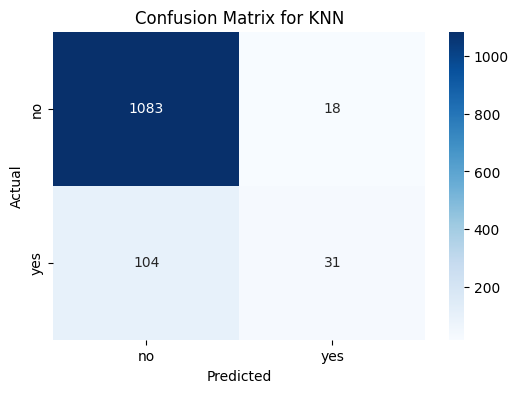

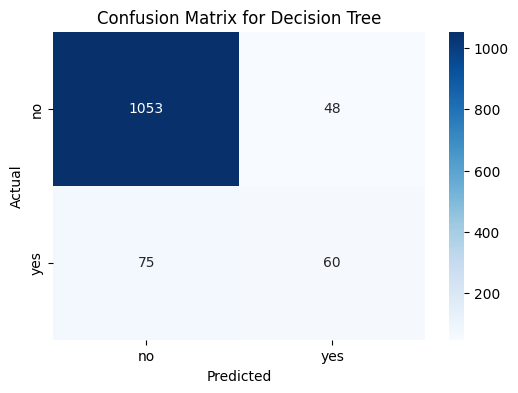

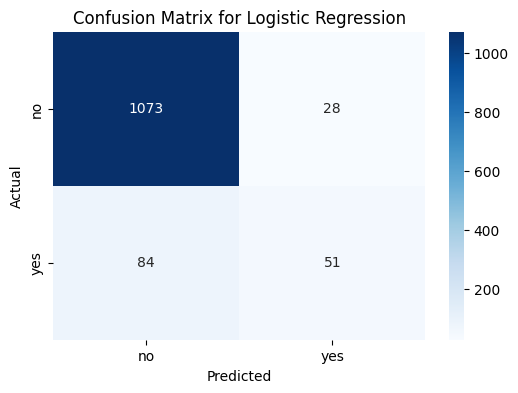

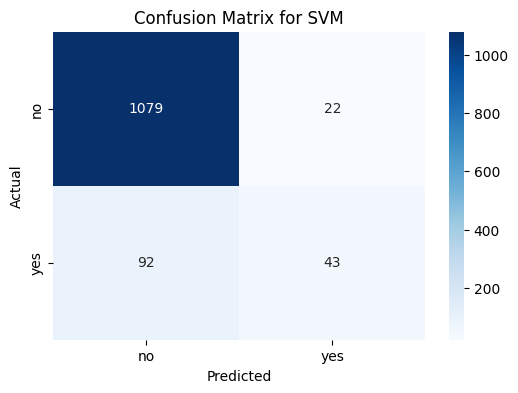


KNN - Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}, AUC-ROC: 0.83
Accuracy: 0.90
Precision for 'no': 0.91
Precision for 'yes': 0.63
Recall for 'no': 0.98
Recall for 'yes': 0.23
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.34
Confusion Matrix:
[[1083   18]
 [ 104   31]]

Decision Tree - Best Parameters: {'max_depth': 10, 'min_samples_split': 10}, AUC-ROC: 0.81
Accuracy: 0.90
Precision for 'no': 0.93
Precision for 'yes': 0.56
Recall for 'no': 0.96
Recall for 'yes': 0.44
F1-Score for 'no': 0.94
F1-Score for 'yes': 0.49
Confusion Matrix:
[[1053   48]
 [  75   60]]

Logistic Regression - Best Parameters: {'C': 1, 'solver': 'liblinear'}, AUC-ROC: 0.92
Accuracy: 0.91
Precision for 'no': 0.93
Precision for 'yes': 0.65
Recall for 'no': 0.97
Recall for 'yes': 0.38
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.48
Confusion Matrix:
[[1073   28]
 [  84   51]]

SVM - Best Parameters: {'C': 0.1, 'kernel': 'linear'}, AUC-ROC: 0.92
Accuracy: 0.91
Precision for 'no': 0.92
Precision for '

In [ ]:
# lets get the confusion matrix for the each best model
for name, result in optimized_results.items():
    best_model = result["best_model"]
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=["no", "yes"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



# Display summary of best results for all models
for name, result in optimized_results.items():
    print(f"\n{name} - Best Parameters: {result['best_params']}, AUC-ROC: {result['auc_roc']:.2f}" if result["auc_roc"] else "")
    classification_report = result['classification_report']
    print(f"Accuracy: {classification_report['accuracy']:.2f}")
    print(f"Precision for 'no': {classification_report['no']['precision']:.2f}")
    print(f"Precision for 'yes': {classification_report['yes']['precision']:.2f}")
    print(f"Recall for 'no': {classification_report['no']['recall']:.2f}")
    print(f"Recall for 'yes': {classification_report['yes']['recall']:.2f}")
    print(f"F1-Score for 'no': {classification_report['no']['f1-score']:.2f}")
    print(f"F1-Score for 'yes': {classification_report['yes']['f1-score']:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, result['best_model'].predict(X_test), labels=['no', 'yes'])}")

In [ ]:
# Lets print the results in a tabular format
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision (no)", "Precision (yes)", "Recall (no)", "Recall (yes)", "F1-Score (no)", "F1-Score (yes)", "AUC-ROC"])
for name, result in optimized_results.items():
    name = f"{name}({result['best_params']})"
    results_df.loc[len(results_df)] = [name, result['classification_report']['accuracy'], result['classification_report']['no']['precision'], result['classification_report']['yes']['precision'], result['classification_report']['no']['recall'], result['classification_report']['yes']['recall'], result['classification_report']['no']['f1-score'], result['classification_report']['yes']['f1-score'], result['auc_roc']]
for name, result in results.items():
    results_df.loc[len(results_df)] = [name, result['classification_report']['accuracy'], result['classification_report']['no']['precision'], result['classification_report']['yes']['precision'], result['classification_report']['no']['recall'], result['classification_report']['yes']['recall'], result['classification_report']['no']['f1-score'], result['classification_report']['yes']['f1-score'], result['roc_auc']]

results_df.set_index("Model", inplace=True)
results_df

,Accuracy,Precision (no),Precision (yes),Recall (no),Recall (yes),F1-Score (no),F1-Score (yes),AUC-ROC
Model,,,,,,,,
"KNN({'n_neighbors': 9, 'weights': 'distance'})",0.901294,0.912384,0.632653,0.983651,0.229630,0.946678,0.336957,0.831480
"Decision Tree({'max_depth': 10, 'min_samples_split': 10})",0.900485,0.933511,0.555556,0.956403,0.444444,0.944818,0.493827,0.812053
"Logistic Regression({'C': 1, 'solver': 'liblinear'})",0.909385,0.927398,0.645570,0.974569,0.377778,0.950399,0.476636,0.923760
"SVM({'C': 0.1, 'kernel': 'linear'})",0.907767,0.921435,0.661538,0.980018,0.318519,0.949824,0.430000,0.921849
KNN,0.891586,0.911489,0.508197,0.972752,0.229630,0.941125,0.316327,0.805540
Decision Tree,0.884304,0.939450,0.472603,0.930064,0.511111,0.934733,0.491103,0.720587
Logistic Regression,0.909385,0.927398,0.645570,0.974569,0.377778,0.950399,0.476636,0.924116
SVM,0.906149,0.916314,0.679245,0.984559,0.266667,0.949212,0.382979,0.907431


### Summary of Results After Hyperparameter Optimization:

| **Model**                                      | **Accuracy** | **Precision (no)** | **Precision (yes)** | **Recall (no)** | **Recall (yes)** | **F1-Score (no)** | **F1-Score (yes)** | **AUC-ROC** |
|------------------------------------------------|--------------|---------------------|----------------------|------------------|------------------|--------------------|--------------------|-------------|
| **KNN** ({'n_neighbors': 9, 'weights': 'distance'}) | 0.901       | 0.912               | 0.633                | 0.984            | 0.230            | 0.947              | 0.337              | 0.831       |
| **Decision Tree** ({'max_depth': 10, 'min_samples_split': 10}) | 0.900       | 0.934               | 0.556                | 0.956            | 0.444            | 0.945              | 0.494              | 0.812       |
| **Logistic Regression** ({'C': 1, 'solver': 'liblinear'}) | 0.909       | 0.927               | 0.646                | 0.975            | 0.378            | 0.950              | 0.477              | **0.924**   |
| **SVM** ({'C': 0.1, 'kernel': 'linear'})       | 0.908       | 0.921               | 0.662                | 0.980            | 0.319            | 0.950              | 0.430              | 0.922       |
| **Baseline KNN**                                | 0.892       | 0.911               | 0.508                | 0.973            | 0.230            | 0.941              | 0.316              | 0.806       |
| **Baseline Decision Tree**                     | 0.884       | 0.939               | 0.473                | 0.930            | 0.511            | 0.935              | 0.491              | 0.721       |
| **Baseline Logistic Regression**               | 0.909       | 0.927               | 0.646                | 0.975            | 0.378            | 0.950              | 0.477              | **0.924**   |
| **Baseline SVM**                                | 0.906       | 0.916               | 0.679                | 0.985            | 0.267            | 0.949              | 0.383              | 0.907       |

### Key Observations:
1. **Best AUC-ROC**:
   - **Logistic Regression (Optimized)**: 0.924 (no change compared to the baseline).
   - Closely followed by **SVM (Optimized)** with 0.922.

2. **Recall for `yes`** (Minority Class):
   - **Decision Tree (Optimized)** performs the best with 44.4%, suggesting improved identification of "yes".

3. **Overall Accuracy**:
   - **Logistic Regression (Optimized)** achieves the highest accuracy at 90.9%.
   - SVM (Optimized) follows closely with 90.8%.

4. **F1-Score**:
   - For the majority class (`no`), all models perform similarly.
   - For the minority class (`yes`), **Decision Tree (Optimized)** performs the best with an F1-score of 0.494.

### Conclusion:
- Logistic Regression (Optimized) offers the best overall balance of performance metrics, making it the most reliable choice.
- For better recall of the minority class (`yes`), Decision Tree (Optimized) provides a suitable alternative. 

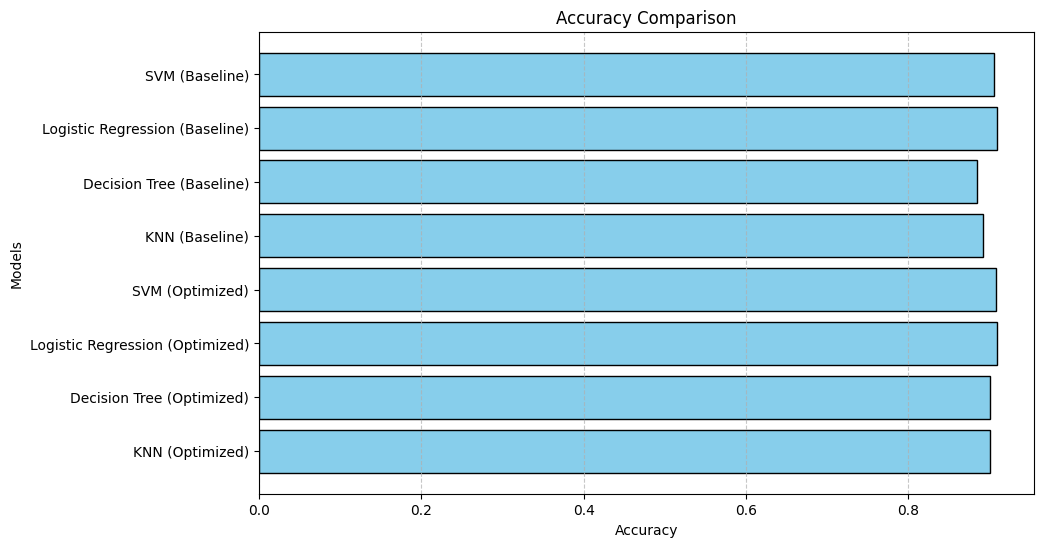

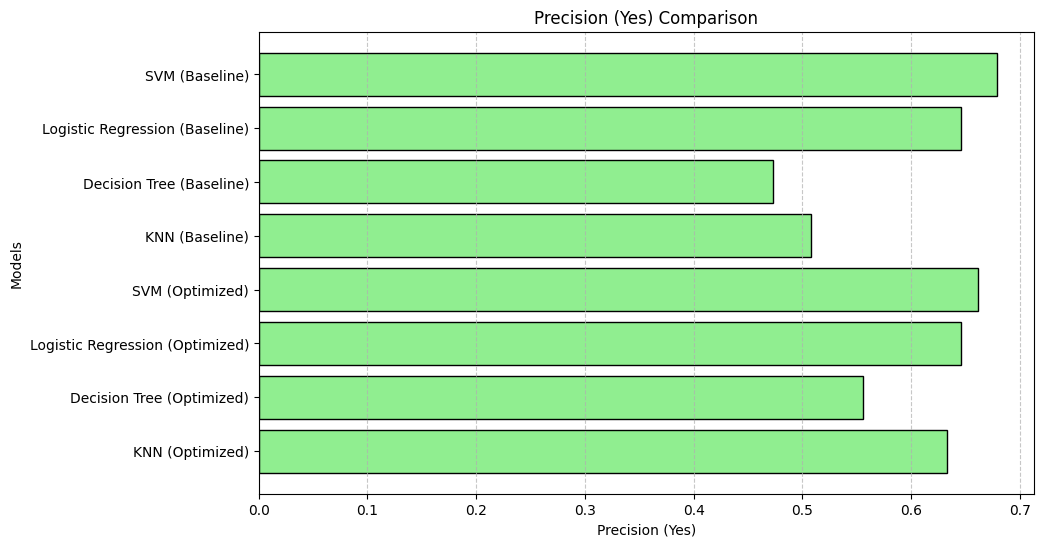

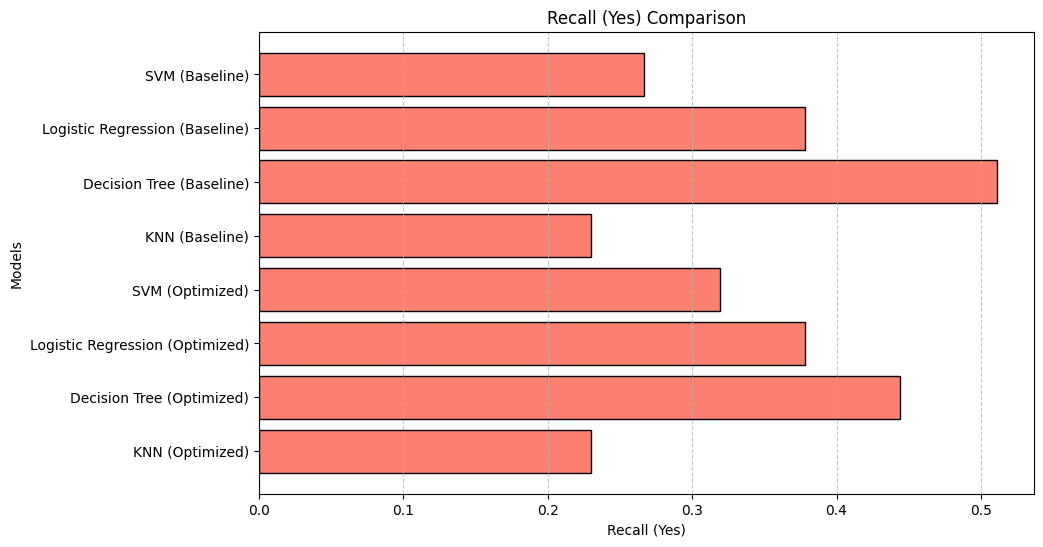

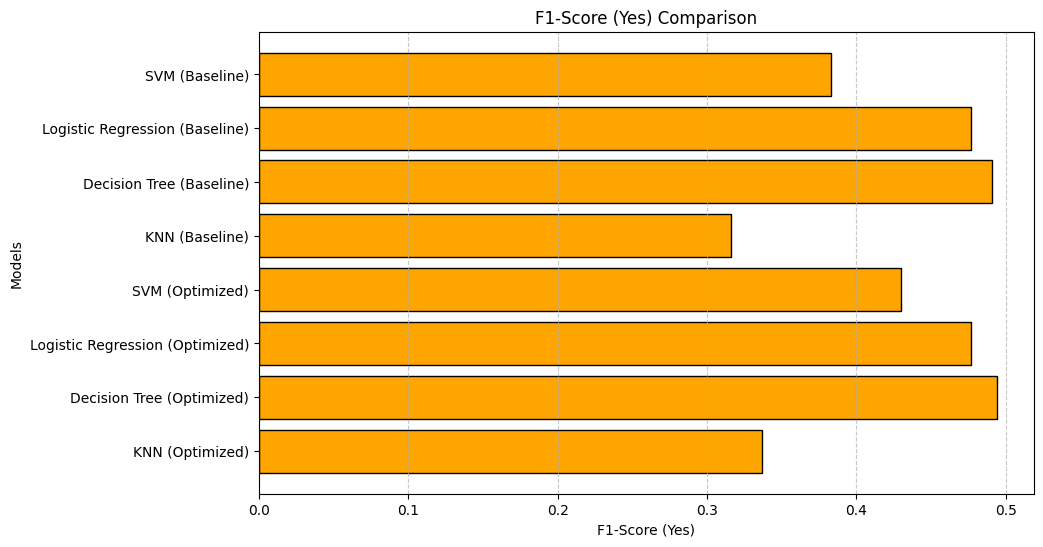

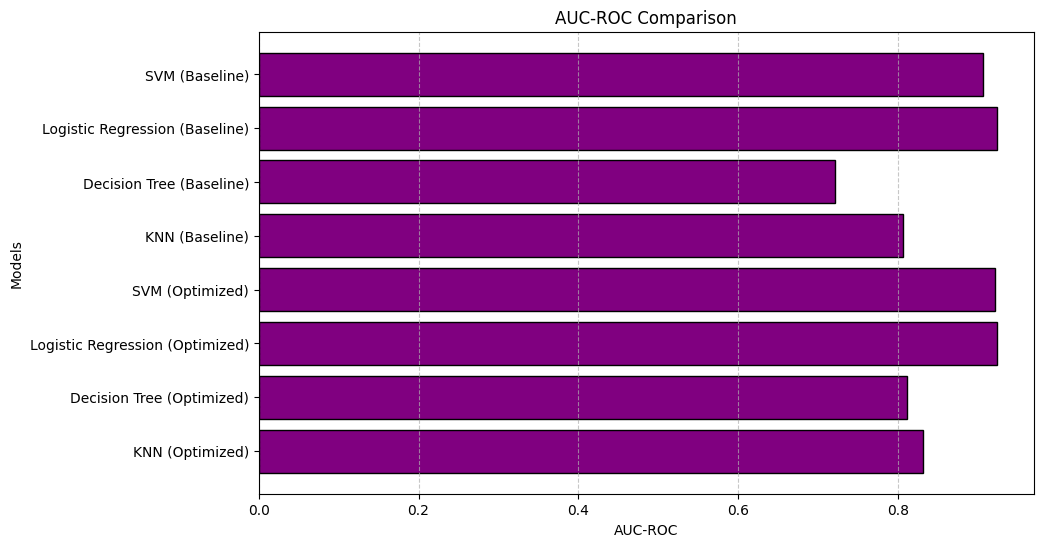

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
models = [
    "KNN (Optimized)", "Decision Tree (Optimized)", "Logistic Regression (Optimized)", "SVM (Optimized)",
    "KNN (Baseline)", "Decision Tree (Baseline)", "Logistic Regression (Baseline)", "SVM (Baseline)"
]
accuracy = [0.901, 0.900, 0.909, 0.908, 0.892, 0.884, 0.909, 0.906]
precision_yes = [0.633, 0.556, 0.646, 0.662, 0.508, 0.473, 0.646, 0.679]
recall_yes = [0.230, 0.444, 0.378, 0.319, 0.230, 0.511, 0.378, 0.267]
f1_score_yes = [0.337, 0.494, 0.477, 0.430, 0.316, 0.491, 0.477, 0.383]
auc_roc = [0.831, 0.812, 0.924, 0.922, 0.806, 0.721, 0.924, 0.907]

# Visualization: Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy, color='skyblue', edgecolor='black')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: Precision (Yes) Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, precision_yes, color='lightgreen', edgecolor='black')
plt.title('Precision (Yes) Comparison')
plt.xlabel('Precision (Yes)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: Recall (Yes) Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, recall_yes, color='salmon', edgecolor='black')
plt.title('Recall (Yes) Comparison')
plt.xlabel('Recall (Yes)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: F1-Score (Yes) Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, f1_score_yes, color='orange', edgecolor='black')
plt.title('F1-Score (Yes) Comparison')
plt.xlabel('F1-Score (Yes)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: AUC-ROC Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, auc_roc, color='purple', edgecolor='black')
plt.title('AUC-ROC Comparison')
plt.xlabel('AUC-ROC')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
